### ☀️ Import Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ✏️ Frame the Problem

Given an email, correctly classify whether the email should be marked as spam or not.

### 💾 Load The Data

In [4]:
data = pd.read_csv('/kaggle/input/spam-or-not-spam-dataset/spam_or_not_spam.csv')

data.head(20)

email  label
0    date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1   martin a posted tassos papadopoulos the greek ...      0
2   man threatens explosion in moscow thursday aug...      0
3   klez the virus that won t die already the most...      0
4    in adding cream to spaghetti carbonara which ...      0
5    i just had to jump in here as carbonara is on...      0
6   the scotsman NUMBER august NUMBER playboy want...      0
7   martin adamson wrote isn t it just basically a...      0
8   the scotsman thu NUMBER aug NUMBER meaningful ...      0
9   i have been trying to research via sa mirrors ...      0
10  hello have you seen and discussed this article...      0
11  yes great minds think alike but even withput e...      0
12  on mon aug NUMBER NUMBER at NUMBER NUMBER NUMB...      0
13   from chris garrigues cwg exmh deepeddy com da...      0
14  spamassassin is hurting democracy owen URL int...      0
15  hi all apologies for the possible silly questi...      0
16   in forteana y d mcmann dmcmann b wrote robert...      0
17  in a nutshell solaris is suns own flavour of u...      0
18  apols if this has been posted before URL rob y...      0
19  can someone explain what type of operating sys...      0

In [5]:
data.isnull().sum()

email    1
label    0
dtype: int64

In [6]:
data.info

<bound method DataFrame.info of                                                   email  label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1     martin a posted tassos papadopoulos the greek ...      0
2     man threatens explosion in moscow thursday aug...      0
3     klez the virus that won t die already the most...      0
4      in adding cream to spaghetti carbonara which ...      0
...                                                 ...    ...
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1

[3000 rows x 2 columns]>

### 📊 EDA

#### Create copy of data & drop null values 

In [7]:
data_copy = data.copy(deep=True)

null_row = data_copy[data_copy['email'].isnull()].index

data_copy.drop(index=null_row[0], inplace=True)

data_copy.isnull().sum()

email    0
label    0
dtype: int64

#### What percentage of emails are classified as spam?

<Axes: xlabel='label', ylabel='count'>

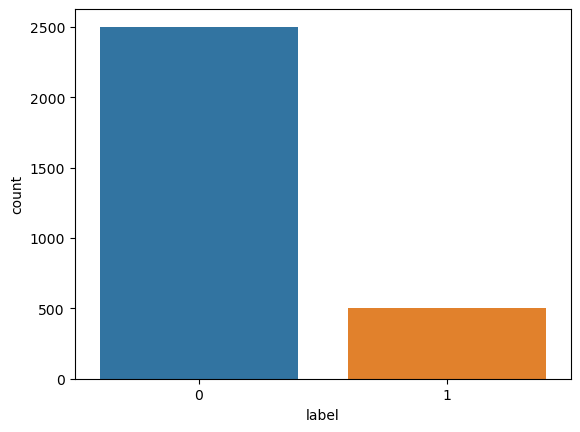

In [8]:
sns.countplot(x='label', data=data_copy)

In [9]:
spam = data_copy[data_copy['label'] == 1]
no_spam = data_copy[data_copy['label'] == 0]

print(f"Spam: {len(spam)} | {len(spam) / len(data)}")
print(f"Not Spam: {len(no_spam)} | {len(no_spam) / len(data)}")

Spam: 499 | 0.16633333333333333
Not Spam: 2500 | 0.8333333333333334


#### What are common traits in spam or no_spam emails?

In [10]:
data_copy['email_length'] = data_copy['email'].apply(len)

data_copy.head()

email  label  email_length
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0          1522
1  martin a posted tassos papadopoulos the greek ...      0           643
2  man threatens explosion in moscow thursday aug...      0          1509
3  klez the virus that won t die already the most...      0          1015
4   in adding cream to spaghetti carbonara which ...      0           771

In [11]:
data_copy.groupby('label').describe()

email_length                                                        \
             count         mean          std  min    25%    50%      75%   
label                                                                      
0           2500.0  1233.672000  3101.999287  5.0  360.0  719.0  1280.25   
1            499.0  2313.669339  9817.766265  1.0  525.0  956.0  1941.00   

                 
            max  
label            
0       82994.0  
1      200408.0

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

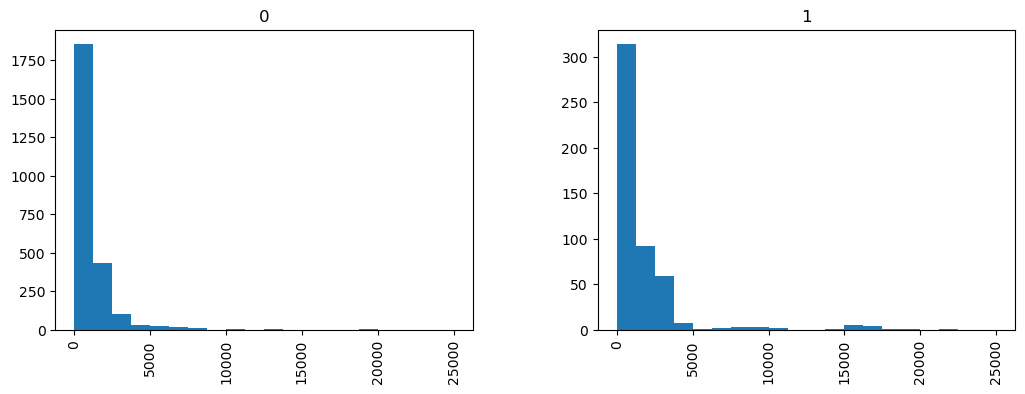

In [13]:
data_copy.hist(column='email_length', by='label', bins=20, figsize=(12,4), range=[0,25000])

#### What are the most popular words in spam emails vs non-spam emails?

In [14]:
import string
from nltk.corpus import stopwords

def process_email(email):
    """
    1. Remove punctuation
    2. Remove stop words
    3. Remove list of clean words
    """
    nopunc = [c for c in email if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
data_copy['email'] = data_copy['email'].apply(process_email)

In [17]:
data_copy.head()

email  label  email_length
0  [date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE...      0          1522
1  [martin, posted, tassos, papadopoulos, greek, ...      0           643
2  [man, threatens, explosion, moscow, thursday, ...      0          1509
3  [klez, virus, die, already, prolific, virus, e...      0          1015
4  [adding, cream, spaghetti, carbonara, effect, ...      0           771

In [16]:
from collections import Counter

spam_string = " ".join(data_copy["email"].tolist())

spam_words = spam_string.split()

spam_words_count = Counter(spam_words)

most_common_words = spam_words_count.most_common(100)

for word, count in most_common_words:
    print(f"{word}: {count}")

TypeError: sequence item 0: expected str instance, list found

### 🧑🏻‍💻 Prepare Data

### 💻 Select & Train Models

### 📈 Fine-Tune Models

### 🌎 Predict Test Data